In [1]:
# stochastic implementation of stuffz

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
# gas is given by the equations

Xh = np.random.random()
Xw = np.random.random()*(1-Xh)
Xc = 1-Xh-Xw


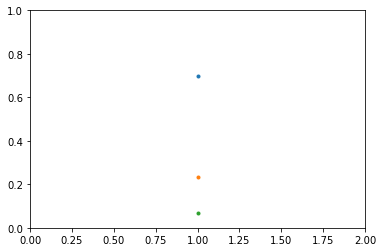

In [7]:
ts = 1
plt.plot(ts,Xh,'.')
plt.plot(ts,Xw,'.')
plt.plot(ts,Xc,'.')
plt.axis([0,2,0,1])
plt.show()

# using the model from
# https://arxiv.org/abs/astro-ph/0005081

In [41]:
tsnew = 2 # maybe this should be stochastic random variable. 
# see distribution of times between SF events in MUFASA

# perhaps generalise to  5 component gas model later

# define functional timescales - baryon cycling

# sweeping of warm gas into the cold component at a rate astar(Xw)
astar = 0.5 # usually 5e-8 /yr

# evaporation of cold clouds embedded in the hot gas 
# at a rate bstar(Xc)(Xh)^2
bstar = 0.1 # usually 1e-7 to 1e-8 /yr

# radiative cooling of the hot gas by mixing with the ambient warm gas
# at a rate cstar(Xw)(Xh)
cstar = 1  # usually 1e-6 to 1e-7 /yr
A = astar/cstar
B = bstar/cstar

dtau = cstar*(tsnew - ts)
dXc = (-B*Xc*Xh*Xh + A*(1-Xc-Xh))*dtau
dXh = (-Xh*(1-Xc-Xh) + B*Xc*Xh*Xh)*dtau
print(dXc, dXh)

0.11294999118747778 -0.1593962956023438


In [40]:
sfr = np.power(Xc,1.5)
print(sfr)

0.0176253200605


In [29]:
random_values = np.zeros((10000,))
for i in range(10000):
    random_values[i] = np.random.random()
    

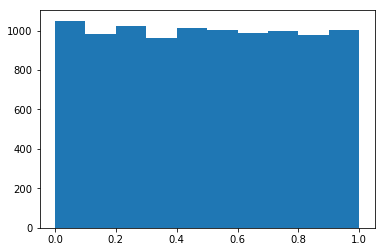

In [31]:
plt.hist(random_values,10)
plt.show()

# A few runs showing generated SFHs

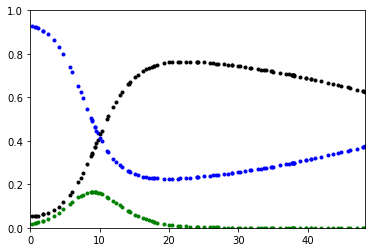

In [47]:
# gas is given by the equations

Xh = np.random.random()
Xw = np.random.random()*(1-Xh)
Xc = 1-Xh-Xw
print('initial conditions: Xh='+str(Xh)+' Xw='+str(Xw)+' Xc=',str(Xc))
time = 0.1

for numsteps in range(100):
    tstep = np.random.random()

    # sweeping of warm gas into the cold component at a rate astar(Xw)
    astar = 0.5 # usually 5e-8 /yr

    # evaporation of cold clouds embedded in the hot gas 
    # at a rate bstar(Xc)(Xh)^2
    bstar = 0.1 # usually 1e-7 to 1e-8 /yr

    # radiative cooling of the hot gas by mixing with the ambient warm gas
    # at a rate cstar(Xw)(Xh)
    cstar = 1  # usually 1e-6 to 1e-7 /yr
    A = astar/cstar
    B = bstar/cstar

    #dtau = cstar*(tsnew - ts)
    dtau = cstar*tstep
    dXc = (-B*Xc*Xh*Xh + A*(1-Xc-Xh))*dtau
    dXh = (-Xh*(1-Xc-Xh) + B*Xc*Xh*Xh)*dtau
    #print(dXc, dXh)
    Xc = Xc + dXc
    Xh = Xh + dXh
    Xw = 1-Xc-Xh

    time = time+tstep
    plt.plot(time,Xc,'k.')
    plt.plot(time,Xw,'g.')
    plt.plot(time,Xh,'b.')

plt.axis([0,time,0,1])
plt.show()


initial conditions: Xh=0.5283815421594223 Xw=0.03492986182480673 Xc= 0.4366885960157709


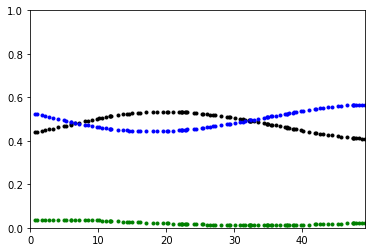

In [51]:
# gas is given by the equations

Xh = np.random.random()
Xw = np.random.random()*(1-Xh)
Xc = 1-Xh-Xw
print('initial conditions: Xh='+str(Xh)+' Xw='+str(Xw)+' Xc=',str(Xc))
time = 0.1

for numsteps in range(100):
    tstep = np.random.random()

    # sweeping of warm gas into the cold component at a rate astar(Xw)
    astar = 0.5 # usually 5e-8 /yr

    # evaporation of cold clouds embedded in the hot gas 
    # at a rate bstar(Xc)(Xh)^2
    bstar = 0.1 # usually 1e-7 to 1e-8 /yr

    # radiative cooling of the hot gas by mixing with the ambient warm gas
    # at a rate cstar(Xw)(Xh)
    cstar = 1  # usually 1e-6 to 1e-7 /yr
    A = astar/cstar
    B = bstar/cstar

    #dtau = cstar*(tsnew - ts)
    dtau = cstar*tstep
    dXc = (-B*Xc*Xh*Xh + A*(1-Xc-Xh))*dtau
    dXh = (-Xh*(1-Xc-Xh) + B*Xc*Xh*Xh)*dtau
    #print(dXc, dXh)
    Xc = Xc + dXc
    Xh = Xh + dXh
    Xw = 1-Xc-Xh

    time = time+tstep
    plt.plot(time,Xc,'k.')
    plt.plot(time,Xw,'g.')
    plt.plot(time,Xh,'b.')

plt.axis([0,time,0,1])
plt.show()


# Make the timestep fixed

In [ ]:
# gas is given by the equations

Xh = np.random.random()
Xw = np.random.random()*(1-Xh)
Xc = 1-Xh-Xw
print('initial conditions: Xh='+str(Xh)+' Xw='+str(Xw)+' Xc=',str(Xc))
time = 0.1

for numsteps in tqdm(range(1000)):
    tstep = 0.1

    # sweeping of warm gas into the cold component at a rate astar(Xw)
    astar = 0.5 # usually 5e-8 /yr

    # evaporation of cold clouds embedded in the hot gas 
    # at a rate bstar(Xc)(Xh)^2
    bstar = 0.1 # usually 1e-7 to 1e-8 /yr

    # radiative cooling of the hot gas by mixing with the ambient warm gas
    # at a rate cstar(Xw)(Xh)
    cstar = 1  # usually 1e-6 to 1e-7 /yr
    A = astar/cstar
    B = bstar/cstar

    #dtau = cstar*(tsnew - ts)
    dtau = cstar*tstep
    dXc = (-B*Xc*Xh*Xh + A*(1-Xc-Xh))*dtau
    dXh = (-Xh*(1-Xc-Xh) + B*Xc*Xh*Xh)*dtau
    #print(dXc, dXh)
    Xc = Xc + dXc
    Xh = Xh + dXh
    Xw = 1-Xc-Xh

    time = time+tstep
    plt.plot(time,Xc,'k.')
    plt.plot(time,Xw,'g.')
    plt.plot(time,Xh,'b.')

plt.axis([0,time,0,1])
plt.show()


# Extending the time range to larger ranges

  0%|          | 1/10000 [00:00<23:47,  7.00it/s]

initial conditions: Xh=0.7326648939543758 Xw=0.2133712438487868 Xc= 0.05396386219683735


100%|██████████| 10000/10000 [12:17<00:00,  7.03it/s]


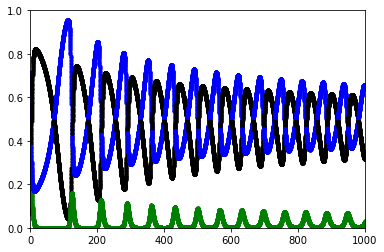

In [67]:
# gas is given by the equations

Xh = np.random.random()
Xw = np.random.random()*(1-Xh)
Xc = 1-Xh-Xw
print('initial conditions: Xh='+str(Xh)+' Xw='+str(Xw)+' Xc=',str(Xc))
time = 0.1

for numsteps in tqdm(range(10000)):
    tstep = 0.1

    # sweeping of warm gas into the cold component at a rate astar(Xw)
    astar = 0.5 # usually 5e-8 /yr

    # evaporation of cold clouds embedded in the hot gas 
    # at a rate bstar(Xc)(Xh)^2
    bstar = 0.1 # usually 1e-7 to 1e-8 /yr

    # radiative cooling of the hot gas by mixing with the ambient warm gas
    # at a rate cstar(Xw)(Xh)
    cstar = 1  # usually 1e-6 to 1e-7 /yr
    A = astar/cstar
    B = bstar/cstar

    #dtau = cstar*(tsnew - ts)
    dtau = cstar*tstep
    dXc = (-B*Xc*Xh*Xh + A*(1-Xc-Xh))*dtau
    dXh = (-Xh*(1-Xc-Xh) + B*Xc*Xh*Xh)*dtau
    #print(dXc, dXh)
    Xc = Xc + dXc
    Xh = Xh + dXh
    Xw = 1-Xc-Xh

    time = time+tstep
    plt.plot(time,Xc,'k.')
    plt.plot(time,Xw,'g.')
    plt.plot(time,Xh,'b.')

plt.axis([0,time,0,1])
plt.show()


# Changing parameter values

  0%|          | 2/1000 [00:00<00:50, 19.57it/s]

initial conditions: Xh=0.23116718785935486 Xw=0.3847407836180109 Xc= 0.38409202852263424


100%|██████████| 1000/1000 [00:13<00:00, 76.08it/s]


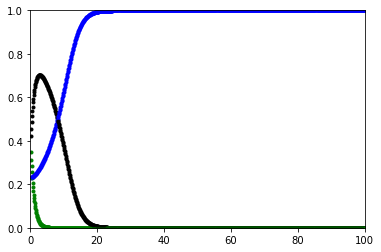

In [78]:
# gas is given by the equations

Xh = np.random.random()
Xw = np.random.random()*(1-Xh)
Xc = 1-Xh-Xw
print('initial conditions: Xh='+str(Xh)+' Xw='+str(Xw)+' Xc=',str(Xc))
time = 0.1

for numsteps in tqdm(range(1000)):
    tstep = 0.1

    # sweeping of warm gas into the cold component at a rate astar(Xw)
    astar = 1 # usually 5e-8 /yr

    # evaporation of cold clouds embedded in the hot gas 
    # at a rate bstar(Xc)(Xh)^2
    bstar = 1 # usually 1e-7 to 1e-8 /yr

    # radiative cooling of the hot gas by mixing with the ambient warm gas
    # at a rate cstar(Xw)(Xh)
    cstar = 0.1  # usually 1e-6 to 1e-7 /yr
    A = astar/cstar
    B = bstar/cstar

    #dtau = cstar*(tsnew - ts)
    dtau = cstar*tstep
    dXc = (-B*Xc*Xh*Xh + A*(1-Xc-Xh))*dtau
    dXh = (-Xh*(1-Xc-Xh) + B*Xc*Xh*Xh)*dtau
    #print(dXc, dXh)
    Xc = Xc + dXc
    Xh = Xh + dXh
    Xw = 1-Xc-Xh

    time = time+tstep
    plt.plot(time,Xc,'k.')
    plt.plot(time,Xw,'g.')
    plt.plot(time,Xh,'b.')

plt.axis([0,time,0,1])
plt.show()


  0%|          | 1/1000 [00:00<02:19,  7.17it/s]

initial conditions: Xh=0.8681293921437364 Xw=0.014858632092101086 Xc= 0.1170119757641625


100%|██████████| 1000/1000 [00:12<00:00, 77.38it/s]


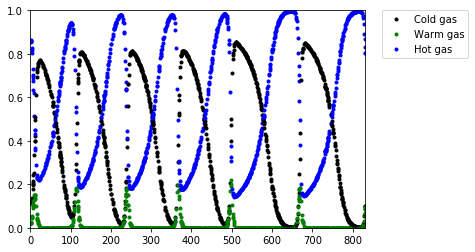

In [87]:
# gas is given by the equations

Xh = np.random.random()
Xw = np.random.random()*(1-Xh)
Xc = 1-Xh-Xw
print('initial conditions: Xh='+str(Xh)+' Xw='+str(Xw)+' Xc=',str(Xc))
time = 0.1

for numsteps in tqdm(range(1000)):
    tstep = np.absolute(np.random.normal(loc=0.3,scale = 1.0)*1)

    # sweeping of warm gas into the cold component at a rate astar(Xw)
    astar = 0.5 # usually 5e-8 /yr

    # evaporation of cold clouds embedded in the hot gas 
    # at a rate bstar(Xc)(Xh)^2
    bstar = 0.1 # usually 1e-7 to 1e-8 /yr

    # radiative cooling of the hot gas by mixing with the ambient warm gas
    # at a rate cstar(Xw)(Xh)
    cstar = 1  # usually 1e-6 to 1e-7 /yr
    A = astar/cstar
    B = bstar/cstar

    #dtau = cstar*(tsnew - ts)
    dtau = cstar*tstep
    dXc = (-B*Xc*Xh*Xh + A*(1-Xc-Xh))*dtau
    dXh = (-Xh*(1-Xc-Xh) + B*Xc*Xh*Xh)*dtau
    #print(dXc, dXh)
    Xc = Xc + dXc
    Xh = Xh + dXh
    Xw = 1-Xc-Xh

    time = time+tstep
    plt.plot(time,Xc,'k.')
    plt.plot(time,Xw,'g.')
    plt.plot(time,Xh,'b.')

plt.plot(time,Xc,'k.',label="Cold gas")
plt.plot(time,Xw,'g.',label="Warm gas")
plt.plot(time,Xh,'b.',label="Hot gas")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axis([0,time,0,1])
plt.show()


# Add a stochastic component to the equations

  0%|          | 3/1000 [00:00<00:35, 28.05it/s]

initial conditions: Xh=0.242 Xw=0.161 Xc= 0.161


100%|██████████| 1000/1000 [00:13<00:00, 76.91it/s]


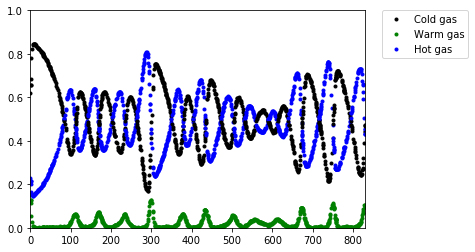

In [107]:
# gas is given by the equations

Xh = np.random.random()
Xw = np.random.random()*(1-Xh)
Xc = 1-Xh-Xw
print('initial conditions: Xh='+'%.3f'%(Xh)+' Xw='+'%.3f'%Xw+' Xc=','%.3f'%Xw)
time = 0.1

for numsteps in tqdm(range(1000)):
    tstep = np.absolute(np.random.normal(loc=0.3,scale = 1.0)*1)

    # sweeping of warm gas into the cold component at a rate astar(Xw)
    astar = 0.5 # usually 5e-8 /yr

    # evaporation of cold clouds embedded in the hot gas 
    # at a rate bstar(Xc)(Xh)^2
    bstar = 0.1 # usually 1e-7 to 1e-8 /yr

    # radiative cooling of the hot gas by mixing with the ambient warm gas
    # at a rate cstar(Xw)(Xh)
    cstar = 1  # usually 1e-6 to 1e-7 /yr
    A = astar/cstar
    B = bstar/cstar

    #dtau = cstar*(tsnew - ts)
    noisestrength = 1e-3
    dtau = cstar*tstep
    dXc = (-B*Xc*Xh*Xh + A*(1-Xc-Xh))*dtau + np.random.normal()*noisestrength
    dXh = (-Xh*(1-Xc-Xh) + B*Xc*Xh*Xh)*dtau + np.random.normal()*noisestrength
    #print(dXc, dXh)
    Xc = Xc + dXc
    Xh = Xh + dXh
    Xw = 1-Xc-Xh
    if Xc < 0:
        Xc = -Xc
        Xh = Xh-Xc/2
        Xw = Xw-Xc/2
    if Xw < 0:
        Xw = -Xw
        Xc = Xc-Xw/2
        Xh = Xh-Xw/2
    if Xh < 0:
        Xh = -Xh
        Xc = Xc-Xh/2
        Xw = Xw-Xh/2
    #print('step conditions: Xh='+'%.3f'%(Xh)+' Xw='+'%.3f'%Xw+' Xc=','%.3f'%Xw)

    time = time+tstep
    plt.plot(time,Xc,'k.')
    plt.plot(time,Xw,'g.')
    plt.plot(time,Xh,'b.')

plt.plot(time,Xc,'k.',label="Cold gas")
plt.plot(time,Xw,'g.',label="Warm gas")
plt.plot(time,Xh,'b.',label="Hot gas")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axis([0,time,0,1])
plt.show()
